<a href="https://colab.research.google.com/github/kaviya2478/100_days_ML/blob/main/End_to_End_Toy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd

In [11]:
df=pd.read_csv('/content/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [13]:
df.shape

(100, 4)

In [14]:
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


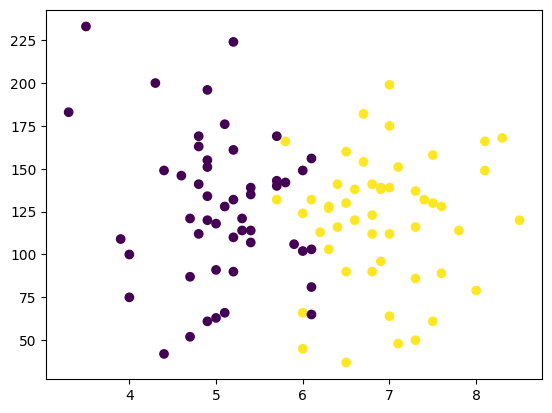

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [17]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y.shape

(100,)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [20]:
x_train

,cgpa,iq
98,6.3,103.0
68,4.0,75.0
3,7.4,132.0
11,6.9,138.0
91,7.5,158.0
...,...,...
22,4.9,120.0
59,4.8,112.0
82,6.5,37.0
80,4.9,196.0


In [21]:
y_train

,placement
98,1
68,0
3,1
11,1
91,1
...,...
22,0
59,0
82,1
80,0


In [22]:
x_test

,cgpa,iq
56,6.1,65.0
86,5.1,128.0
90,7.3,86.0
48,6.6,138.0
85,5.8,166.0
31,3.9,109.0
35,6.8,90.0
15,5.1,176.0
62,6.0,102.0
66,6.9,96.0


In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train

array([[ 0.26472123, -0.53352222],
       [-1.72790765, -1.22942078],
       [ 1.21771765,  0.18722985],
       [ 0.78453746,  0.33635097],
       [ 1.30435368,  0.83342136],
       [ 1.39098972, -0.8814715 ],
       [ 0.95780953,  0.65944672],
       [-0.16845896,  0.43576505],
       [ 1.82416991,  0.60973968],
       [-0.51500312, -0.26013351],
       [ 1.73753388, -1.1300067 ],
       [-1.46799953,  1.87726919],
       [ 0.87117349, -0.30984055],
       [-0.60163915, -0.26013351],
       [-1.3813635 , -2.04958693],
       [ 0.4379933 ,  0.13752281],
       [-0.86154727, -1.52766301],
       [ 1.39098972,  0.08781577],
       [-0.68827519, -0.85661798],
       [-0.255095  ,  0.18722985],
       [ 0.69790142, -0.03645183],
       [ 0.78453746,  0.36120449],
       [-0.86154727, -0.83176446],
       [-0.08182292, -0.45896166],
       [ 0.69790142,  0.41091153],
       [ 1.82416991,  1.03224952],
       [ 0.00481311, -1.45310245],
       [-1.12145538, -1.80105173],
       [ 0.09144915,

In [25]:
x_test=scaler.transform(x_test)
x_test

array([[ 0.09144915, -1.47795597],
       [-0.77491123,  0.08781577],
       [ 1.13108161, -0.95603206],
       [ 0.52462934,  0.33635097],
       [-0.16845896,  1.03224952],
       [-1.81454369, -0.38440111],
       [ 0.69790142, -0.85661798],
       [-0.77491123,  1.28078472],
       [ 0.00481311, -0.55837574],
       [ 0.78453746, -0.70749686]])

In [28]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [29]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_test

,placement
56,0
86,0
90,1
48,1
85,1
31,0
35,1
15,0
62,0
66,1


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7

<Axes: >

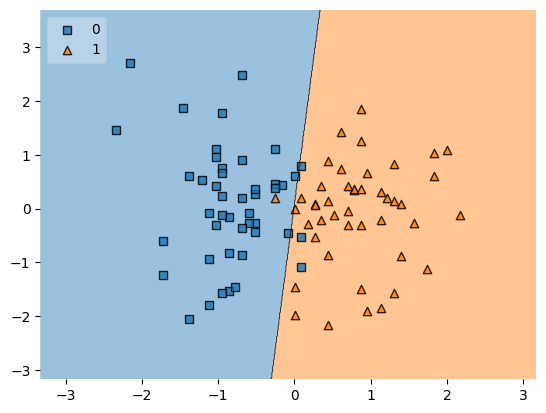

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [36]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))